In [1]:
from pnc_spks import *

## Load and plot data

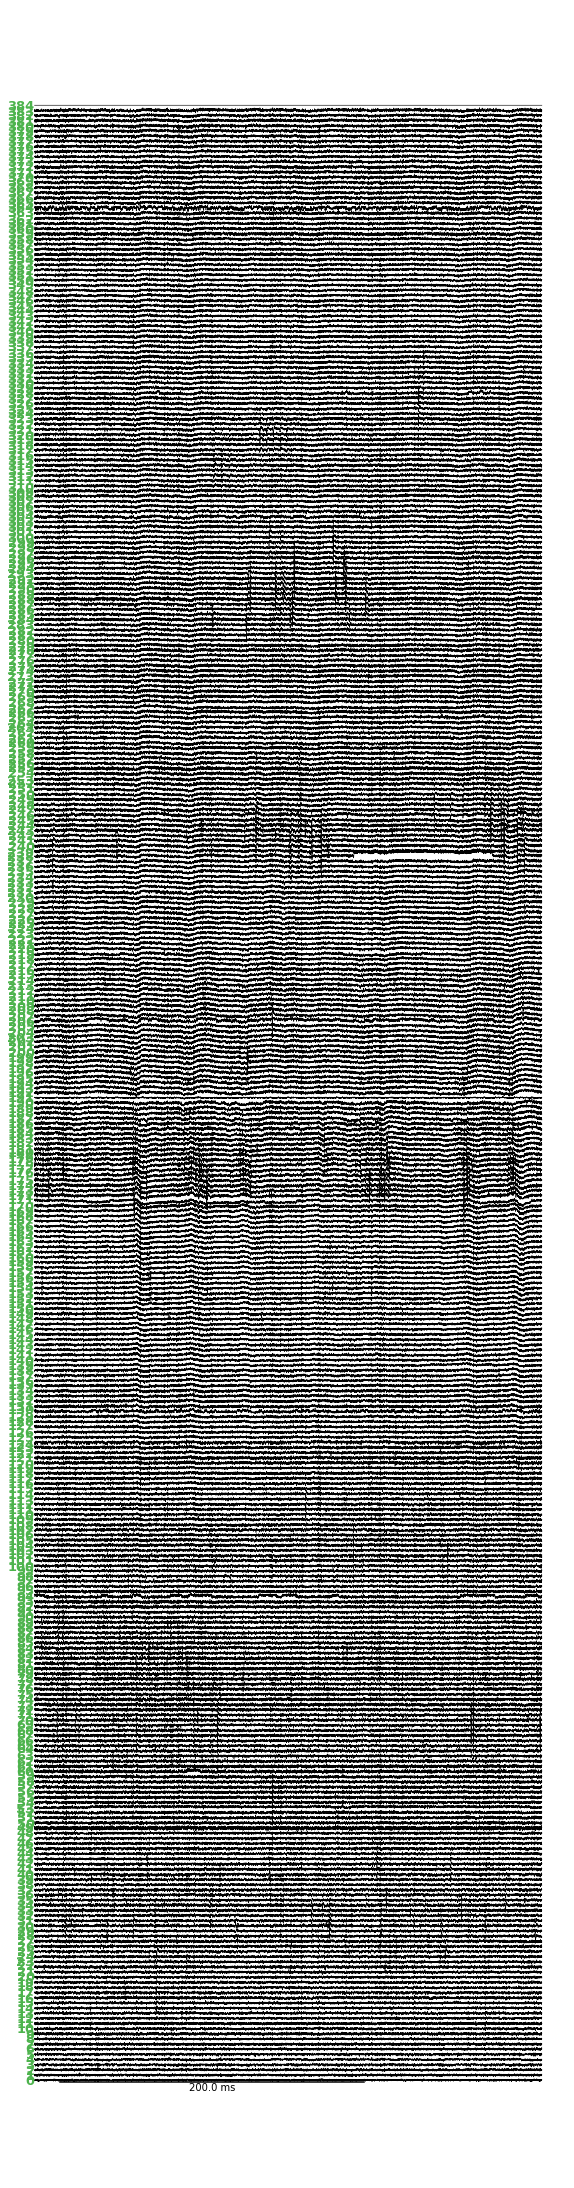

In [71]:
dat,meta = load_spikeglx_binary('/home/joao/data/ephys/raw/GetThatSpike_sync_g1/GetThatSpike_sync_g1_t0.imec0.ap.bin')

%matplotlib inline
plt.figure(figsize=[10,40])
srate = int(meta['imSampRate'])
dat_chunk = dat[305*srate:int(305.5*srate),:].astype(np.float32)
# get the gain from the imro table in the metafile (this can be set per channel)
gain = np.float32(meta['~imroTbl'][1].split(' ')[3]) 
microv_per_bit = ((meta['imAiRangeMax'] - meta['imAiRangeMin'])/(2**16))/gain*1e6
dat_microv = dat_chunk * microv_per_bit
plot_multichannel_data(dat_microv,
                       np.arange(dat.shape[1]),
                       srate = srate,offset = 2);
plt.axis('tight');

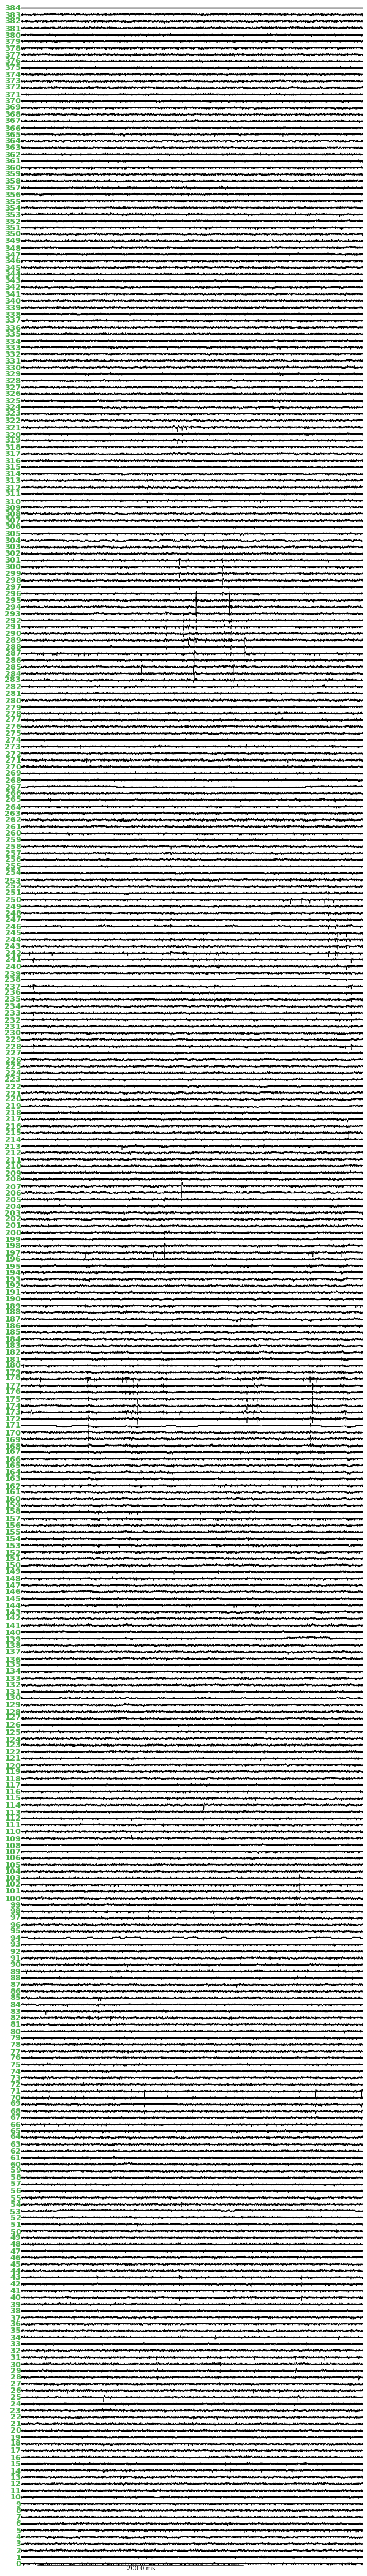

In [70]:
# Get the whitening matrix
w = whitening_matrix(dat[:300000,:])
# plot the whitened signal
plt.figure(figsize=(10,10))
plot_multichannel_data(np.dot(dat_chunk,w),
                       np.arange(dat.shape[1]),srate = 30000,offset = 15);
plt.ylim([15*100,15*150]);